In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 samples
n_samples = 1000

# Create synthetic features
data = {
    'CustomerID': np.arange(1001, 2001),
    'CreditScore': np.random.randint(300, 850, n_samples),
    'Geography': np.random.choice(['France', 'Germany', 'Spain'], n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Age': np.random.randint(18, 92, n_samples),
    'Tenure': np.random.randint(0, 10, n_samples),
    'Balance': np.random.uniform(0, 250000, n_samples).round(2),
    'NumOfProducts': np.random.randint(1, 5, n_samples),
    'HasCrCard': np.random.choice([0, 1], n_samples),
    'IsActiveMember': np.random.choice([0, 1], n_samples),
    'EstimatedSalary': np.random.uniform(10000, 200000, n_samples).round(2),
}

df = pd.DataFrame(data)

# Create a "Churn" target variable with some logic (so the model has something to learn)
# Logic: Older people with high balances in Germany are more likely to churn (just a simulation)
def generate_churn(row):
    score = 0
    if row['Geography'] == 'Germany': score += 2
    if row['Age'] > 50: score += 3
    if row['Balance'] > 100000: score += 1
    if row['IsActiveMember'] == 0: score += 2
    
    # Add randomness
    score += np.random.normal(0, 2)
    return 1 if score > 4 else 0

df['Exited'] = df.apply(generate_churn, axis=1)

# Drop CustomerID as it is not useful for prediction
df = df.drop(columns=['CustomerID'])

print(f"Dataset Shape: {df.shape}")
print(df.head())

Dataset Shape: (1000, 11)
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          402    France    Male   87       5  164257.62              1   
1          735     Spain  Female   29       5  224596.62              1   
2          570   Germany    Male   19       3   99879.70              4   
3          406     Spain    Male   24       3   81698.68              4   
4          371   Germany  Female   20       4    2702.77              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        170299.30       1  
1          1               0         47039.13       1  
2          0               1        167104.89       0  
3          0               0        116904.53       0  
4          1               1        154815.63       0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int32  
 1   Geography        1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   Age              1000 non-null   int32  
 4   Tenure           1000 non-null   int32  
 5   Balance          1000 non-null   float64
 6   NumOfProducts    1000 non-null   int32  
 7   HasCrCard        1000 non-null   int64  
 8   IsActiveMember   1000 non-null   int64  
 9   EstimatedSalary  1000 non-null   float64
 10  Exited           1000 non-null   int64  
dtypes: float64(2), int32(4), int64(3), object(2)
memory usage: 70.4+ KB


In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,563.991000,54.398000,4.483000,123135.075870,2.489000,0.488000,0.513000,104564.329450,0.477000
std,160.508436,20.726727,2.892417,71619.136191,1.119434,0.500106,0.500081,54820.273674,0.499721
min,300.000000,18.000000,0.000000,7.680000,1.000000,0.000000,0.000000,10045.790000,0.000000
25%,423.750000,36.000000,2.000000,62029.785000,2.000000,0.000000,0.000000,57447.210000,0.000000
50%,553.000000,54.000000,5.000000,122772.435000,2.000000,0.000000,1.000000,102308.820000,0.000000
75%,701.250000,72.000000,7.000000,182756.090000,4.000000,1.000000,1.000000,154635.237500,1.000000
max,849.000000,91.000000,9.000000,249437.350000,4.000000,1.000000,1.000000,199849.390000,1.000000


In [5]:
from sklearn.preprocessing import OneHotEncoder

# 1. Initialize the encoder
# sparse_output=False gives you a standard array/dataframe
ohe = OneHotEncoder(sparse_output=False, dtype=int)

# 2. Fit and transform the 'Nation' column
nation_encoded = ohe.fit_transform(df[['Geography']])

# 3. Convert result back to a DataFrame with proper column names
nation_df = pd.DataFrame(nation_encoded, columns=ohe.get_feature_names_out(['Geography']))

# 4. Join it back to your original dataframe and drop the old column
df = df.join(nation_df).drop('Geography', axis=1)

print(df.head())


   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          402    Male   87       5  164257.62              1          1   
1          735  Female   29       5  224596.62              1          1   
2          570    Male   19       3   99879.70              4          0   
3          406    Male   24       3   81698.68              4          0   
4          371  Female   20       4    2702.77              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        170299.30       1                 1   
1               0         47039.13       1                 0   
2               1        167104.89       0                 0   
3               0        116904.53       0                 0   
4               1        154815.63       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  1                0 

In [6]:
from sklearn.preprocessing import OneHotEncoder

# 1. Initialize the encoder
# sparse_output=False gives you a standard array/dataframe
ohe = OneHotEncoder(sparse_output=False, dtype=int)

# 2. Fit and transform the 'Nation' column
nation_encoded = ohe.fit_transform(df[['Gender']])

# 3. Convert result back to a DataFrame with proper column names
nation_df = pd.DataFrame(nation_encoded, columns=ohe.get_feature_names_out(['Gender']))

# 4. Join it back to your original dataframe and drop the old column
df = df.join(nation_df).drop('Gender', axis=1)

print(df.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          402   87       5  164257.62              1          1   
1          735   29       5  224596.62              1          1   
2          570   19       3   99879.70              4          0   
3          406   24       3   81698.68              4          0   
4          371   20       4    2702.77              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        170299.30       1                 1   
1               0         47039.13       1                 0   
2               1        167104.89       0                 0   
3               0        116904.53       0                 0   
4               1        154815.63       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              0            1  
1                  0                1              1            0  
2 

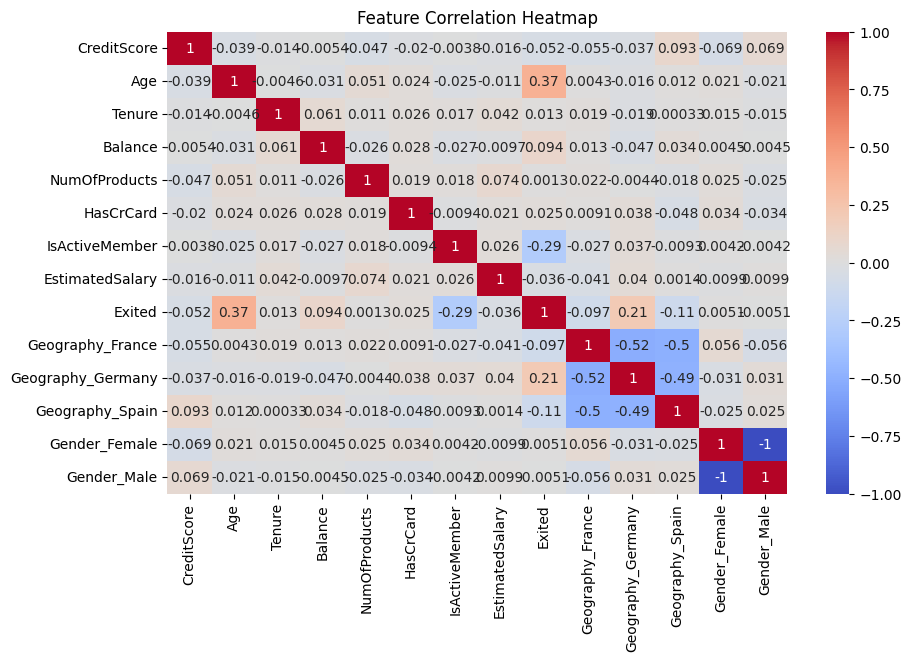

In [7]:
# as we can see that only the mobile usage have a negative co-relation with the final score  and hence also with the at risk section and others are having a postive realtion
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\AMAN TRIVEDI\AppData\Local\Temp\ipykernel_13684\116724932.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')


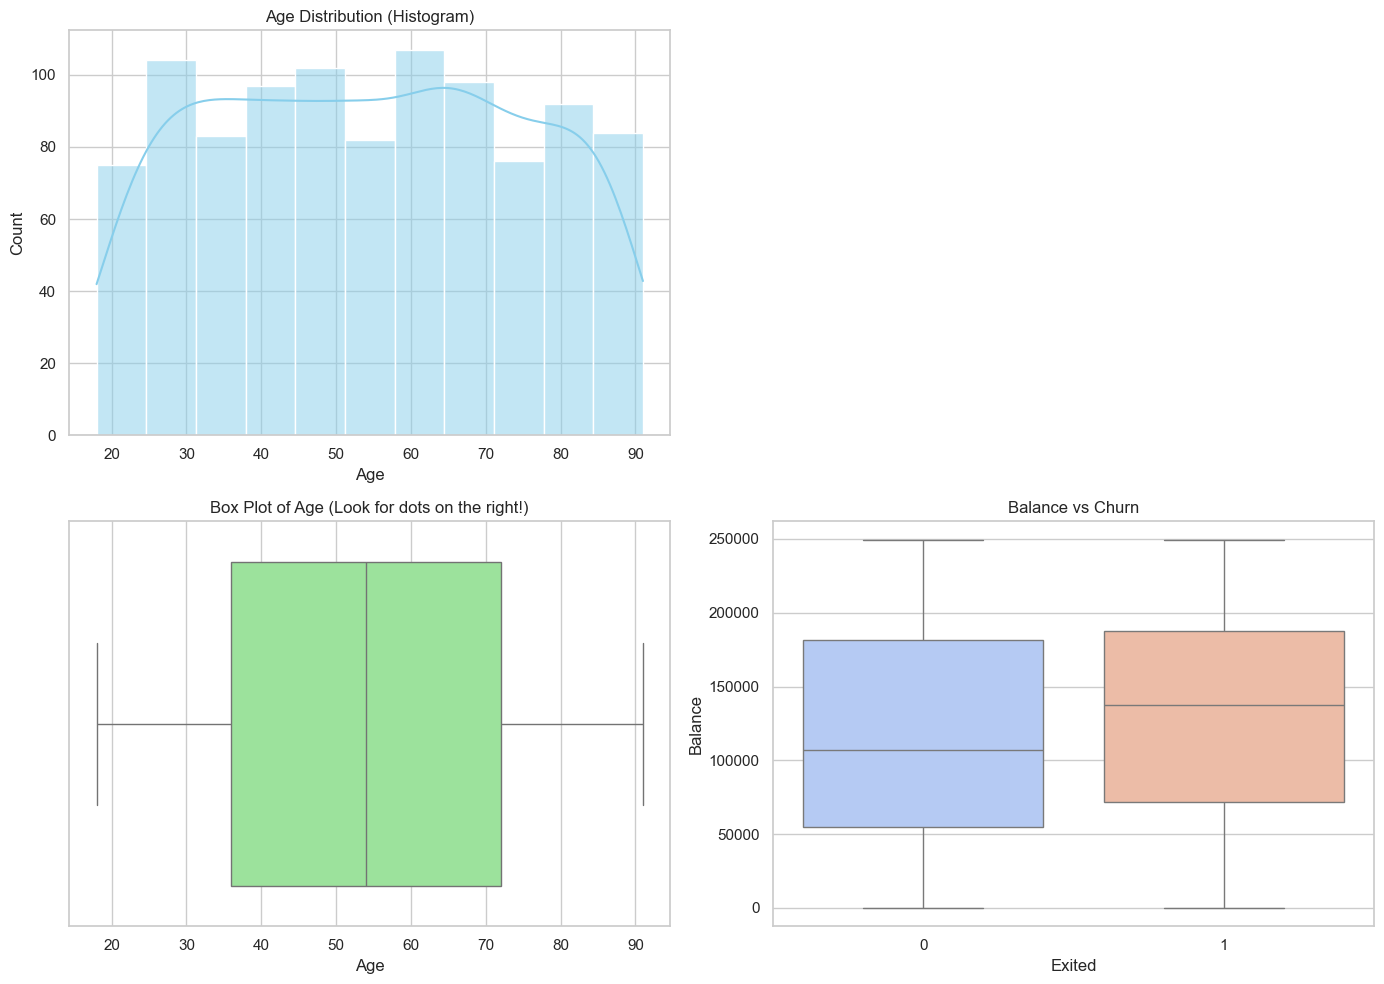

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# --- Graph 1: Age Distribution (Histogram) ---
# Goal: See if customers are young, old, or mixed.
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution (Histogram)')


# Goal: Find outliers. Are there people way older than normal?
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Box Plot of Age (Look for dots on the right!)')

# Goal: Do people who leave (1) have more money than those who stay (0)?
plt.subplot(2, 2, 4)
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title('Balance vs Churn')

# Show the plots
plt.tight_layout()
plt.show()

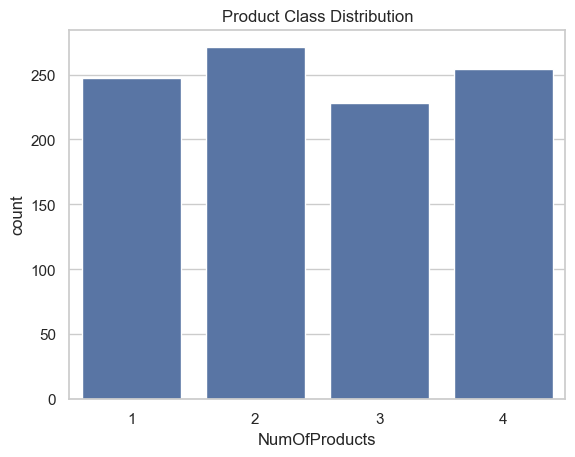

In [9]:
sns.countplot(x=df["NumOfProducts"])
plt.title("Product Class Distribution")
plt.show()

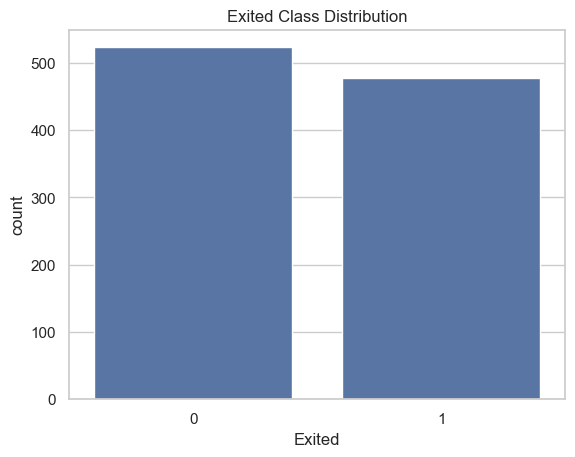

In [10]:
sns.countplot(x=df["Exited"])
plt.title("Exited Class Distribution")
plt.show()

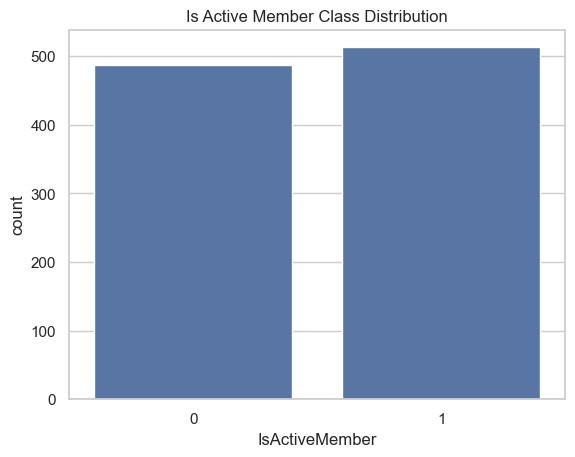

In [11]:

sns.countplot(x=df["IsActiveMember"])
plt.title("Is Active Member Class Distribution")

plt.show()

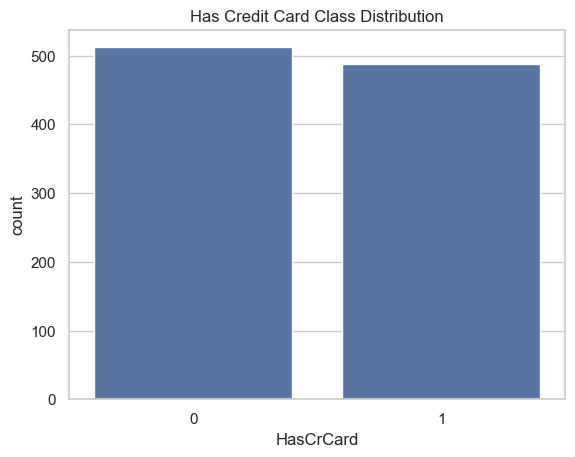

In [12]:
sns.countplot(x=df["HasCrCard"])
plt.title("Has Credit Card Class Distribution")
plt.show()

In [13]:
# Create X by dropping the target column
# ensure you also dropped the original text columns if they are still there!
X = df.drop(columns=['Exited']) 

# Create y
y = df['Exited']

# Double check that X contains ONLY numbers now
print("Features in X:", X.columns)

Features in X: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training shape: (800, 13)
Testing shape: (200, 13)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# --- Model 1: Logistic Regression ---
log_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

# --- Model 2: Decision Tree ---
# We limit depth to prevent overfitting (memorizing)
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42) 
tree_model.fit(X_train_scaled, y_train)
tree_pred = tree_model.predict(X_test_scaled)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
# 1. Initialize the Random Forest
# n_estimators=100 means "build 100 decision trees"
# random_state=42 ensures the result is the same every time you run it
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Train the "Forest"
print("Training the forest... (this takes a moment longer than 1 tree)")
rf_model.fit(X_train_scaled, y_train)

# 3. Make Predictions
rf_predictions = rf_model.predict(X_test_scaled)

# 4. Check the Score
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"--- Final Results ---")
print(f"Single Decision Tree Accuracy: 64.00%") 
print(f"Random Forest Accuracy:        {rf_accuracy*100:.2f}%")

# Optional: See the full report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_predictions))

Training the forest... (this takes a moment longer than 1 tree)
--- Final Results ---
Single Decision Tree Accuracy: 64.00%
Random Forest Accuracy:        70.00%

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        94
           1       0.76      0.63      0.69       106

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [16]:
for depth in [5, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    acc = accuracy_score(y_test, dt.predict(X_test))
    print(f"Depth: {depth} -> Accuracy: {acc:.4f}")
          
print("--- Results ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"Decision Tree Accuracy:       {accuracy_score(y_test, tree_pred):.4f}")

Depth: 5 -> Accuracy: 0.6200
Depth: 10 -> Accuracy: 0.6400
Depth: 15 -> Accuracy: 0.6100
Depth: 20 -> Accuracy: 0.6100
Depth: None -> Accuracy: 0.6100
--- Results ---
Logistic Regression Accuracy: 0.7050
Decision Tree Accuracy:       0.6400


In [17]:
# Extract feature importance
import pandas as pd

importances = pd.Series(tree_model.feature_importances_, index=X.columns)
print("\n--- Top Factors Driving Churn ---")
print(importances.sort_values(ascending=False))


--- Top Factors Driving Churn ---
Age                  0.276622
CreditScore          0.174173
EstimatedSalary      0.125643
Balance              0.122221
IsActiveMember       0.083592
Geography_Germany    0.065261
Tenure               0.064642
NumOfProducts        0.021821
HasCrCard            0.020725
Geography_France     0.018198
Gender_Female        0.014699
Gender_Male          0.012402
Geography_Spain      0.000000
dtype: float64


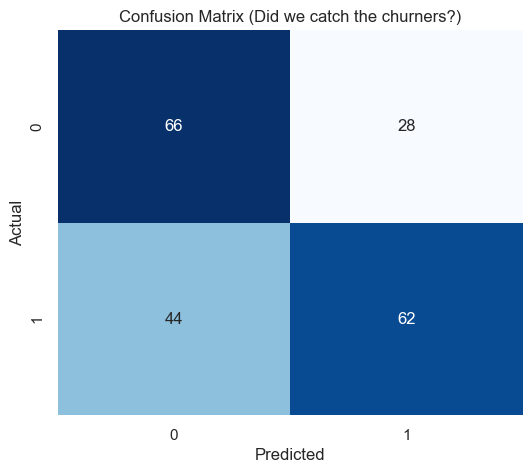

In [18]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Did we catch the churners?)')
plt.show()

